Tasks
Load the dataset and identify the relevant columns.
Use:
Engine size as the input feature
Car price as the output variable
Visualize the relationship between engine size and price.
Build a predictive model to estimate car price based on engine size.
Predict the price for a car with:
Engine size = 200
Increase the flexibility of your model and observe how the curve changes.
Compare predictions from:
a simple straight-line model
a curved model
Analyze which model:
captures the trend better
gives more realistic predictions
Evaluate prediction errors and interpret them in business terms.
Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?

In [1]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('/Users/toshitha/Downloads/archive (3)/CarPrice_Assignment.csv')
data.head()
X=data['enginesize']
y=data['price']
X,y



(0      130
 1      130
 2      152
 3      109
 4      136
       ... 
 200    141
 201    141
 202    173
 203    145
 204    141
 Name: enginesize, Length: 205, dtype: int64,
 0      13495.0
 1      16500.0
 2      16500.0
 3      13950.0
 4      17450.0
         ...   
 200    16845.0
 201    19045.0
 202    21485.0
 203    22470.0
 204    22625.0
 Name: price, Length: 205, dtype: float64)

In [2]:
X = X.values.reshape(-1, 1)
print(X.shape) 


(205, 1)


Text(0, 0.5, 'Price')

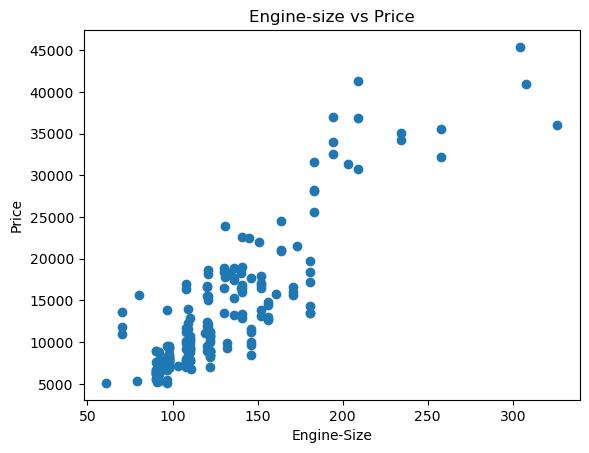

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.title("Engine-size vs Price")
plt.xlabel("Engine-Size")
plt.ylabel("Price")

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# y_pred

Train_pred=model.predict(X_train)
Train_pred


array([14481.40631601, 12159.58244016,  7515.93468845,  8345.15750125,
       10501.13681455,  7184.24556333, 10169.44768942, 17466.60844211,
       18129.98669235,  7184.24556333, 20617.65513077,  9340.22487662,
       12491.27156528,  8345.15750125, 14813.09544113, 16471.54106674,
        3867.35431211, 24432.08006967,  7515.93468845, 10169.44768942,
       22276.10075638, 12491.27156528, 15476.47369138, 10501.13681455,
        7515.93468845, 19456.74319284,  7515.93468845, 17300.76387955,
       10501.13681455,  8511.00206381, 12325.42700272, 10169.44768942,
        7350.09012589, 12159.58244016,  8511.00206381, 10501.13681455,
       18129.98669235,  7515.93468845,  8511.00206381,  7184.24556333,
       12325.42700272, 15642.31825394, 14481.40631601, 17466.60844211,
        7515.93468845, 11993.7378776 ,  8511.00206381, 24432.08006967,
       12491.27156528,  8345.15750125,  7515.93468845, 17466.60844211,
       12491.27156528,  7184.24556333, 12325.42700272,  8345.15750125,
      

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly

array([29668.82463263, 13243.14058734, 11400.49094241, 11558.07076978,
       24032.36184671,  8433.1451247 ,  9947.3365299 ,  8533.04659345,
        9685.27043922,  8433.1451247 , 14153.23216302,  8533.04659345,
       14909.77302839, 11717.74155238, 39926.71722089,  7978.2007602 ,
        7054.32304461, 18142.67080995, 11717.74155238,  9685.27043922,
       11717.74155238, 23589.25727992,  8433.1451247 ,  7978.2007602 ,
        7817.66742617, 29668.82463263, 16086.82034067, 15102.57263464,
        8433.1451247 , 15102.57263464, 24032.36184671,  7817.66742617,
        7978.2007602 , 21819.89598386,  8533.04659345, 24032.36184671,
        9685.27043922,  6955.07323127,  7817.66742617, 18142.67080995,
        9685.27043922])

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linear=mean_squared_error(y_test,y_pred)
r2_linear=r2_score(y_test,y_pred)
mse_poly=mean_squared_error(y_test,y_pred_poly)
r2_poly=r2_score(y_test,y_pred_poly)
r2_score1=r2_score(y_train,Train_pred)
print(f"mse-linear:{mse_linear}\nr2-linear:{r2_linear}\nmse_poly:{mse_poly}\nr2_poly:{r2_poly*100}\nr2_score_train:{r2_score1*100}")

mse-linear:15465458.965908464
r2-linear:0.8040958796678976
mse_poly:11621389.455179848
r2_poly:85.27894915196237
r2_score_train:75.07055061579612


In [35]:
print(X.shape)
y.shape

(205, 1)


(205,)

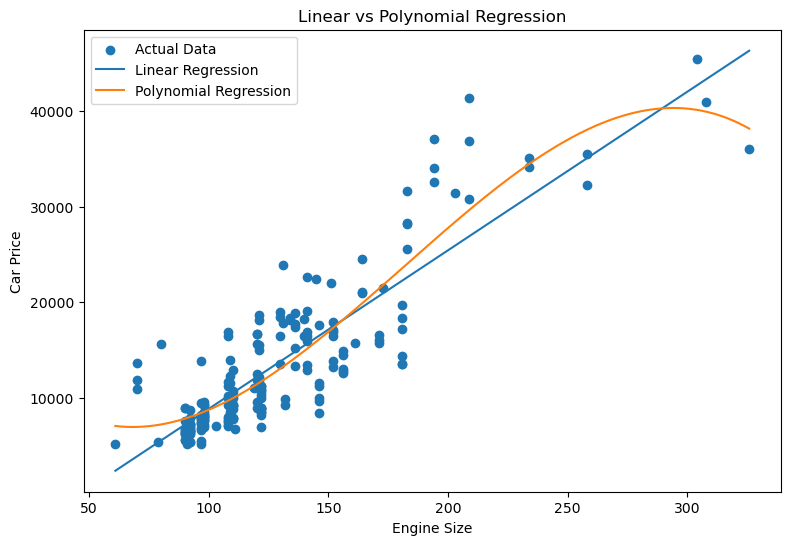

Linear Regression Prediction (200): [25427.14744504]
Polynomial Regression Prediction (200): [27760.60834541]


In [39]:
import numpy as np
X_grid = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)

# ----------------------------
# 6. Plot both models
# ----------------------------
plt.figure(figsize=(9, 6))

# Actual data
plt.scatter(X, y, label="Actual Data")

# Linear regression line
plt.plot(X_grid, model.predict(X_grid),
         label="Linear Regression")

# Polynomial regression curve
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)),
         label="Polynomial Regression")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# ----------------------------
# 7. Predict for engine size = 200
# ----------------------------
linear_price = model.predict([[200]])
poly_price = poly_reg.predict(poly.transform([[200]]))

print("Linear Regression Prediction (200):", linear_price)
print("Polynomial Regression Prediction (200):", poly_price)

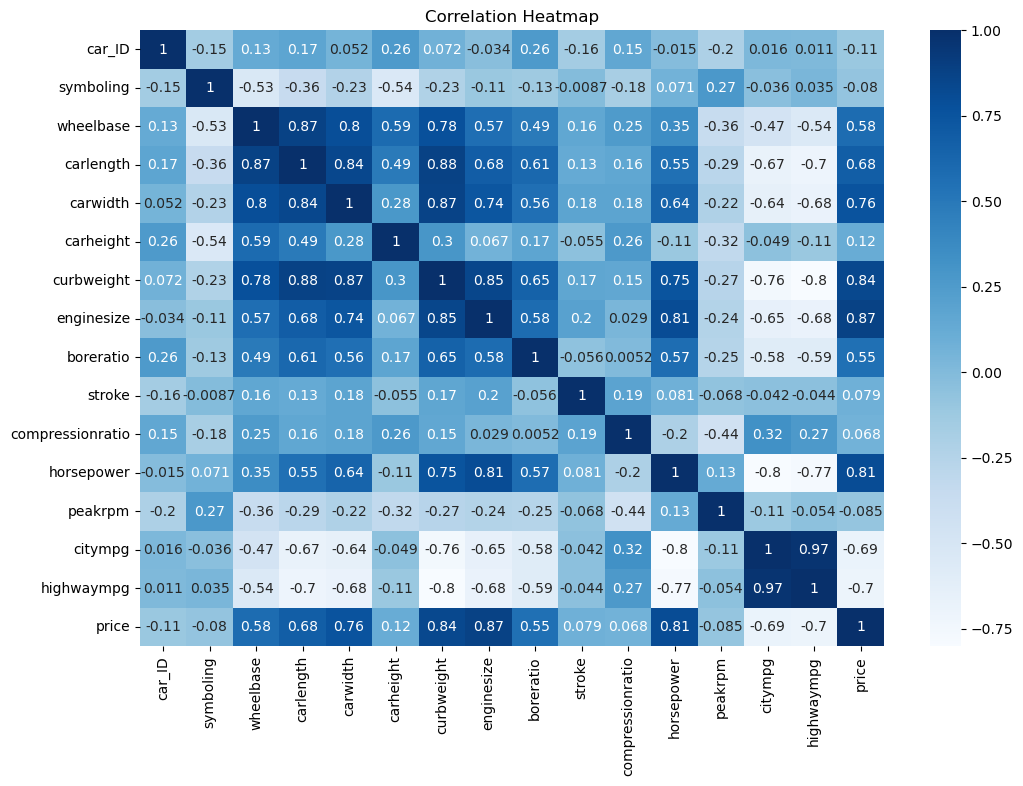

In [59]:
numeric_data = data.select_dtypes(include='number')  # only numeric columns
corr_matrix = numeric_data.corr()  # correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
def categorize_corr(value):
    if value > 0.5:
        return "Strong Positive"
    elif 0 < value <= 0.5:
        return "Weak Positive"
    elif value < -0.5:
        return "Strong Negative"
    elif -0.5 <= value < 0:
        return "Weak Negative"
    else:
        return "No Correlation"


categorized_corr = corr_matrix.applymap(categorize_corr)


pairs = []
for i in range(len(numeric_data.columns)):
    for j in range(i+1, len(numeric_data.columns)):
        feature1 = numeric_data.columns[i]
        feature2 = numeric_data.columns[j]
        category = categorized_corr.iloc[i, j]
        pairs.append((feature1, feature2, category))


pairs_df = pd.DataFrame(pairs, columns=['Feature1', 'Feature2', 'Correlation_Category'])

print(pairs_df)



       Feature1    Feature2 Correlation_Category
0        car_ID   symboling        Weak Negative
1        car_ID   wheelbase        Weak Positive
2        car_ID   carlength        Weak Positive
3        car_ID    carwidth        Weak Positive
4        car_ID   carheight        Weak Positive
..          ...         ...                  ...
115     peakrpm  highwaympg        Weak Negative
116     peakrpm       price        Weak Negative
117     citympg  highwaympg      Strong Positive
118     citympg       price      Strong Negative
119  highwaympg       price      Strong Negative

[120 rows x 3 columns]


/var/folders/j8/9zcv43xs6rg4xzt0zjcyy_dr0000gn/T/ipykernel_4663/4123608768.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorized_corr = corr_matrix.applymap(categorize_corr)


wheelbase and carlength have correlation of 0.87
wheelbase and carwidth have correlation of 0.80
wheelbase and curbweight have correlation of 0.78
carlength and carwidth have correlation of 0.84
carlength and curbweight have correlation of 0.88
carwidth and curbweight have correlation of 0.87
curbweight and enginesize have correlation of 0.85
curbweight and horsepower have correlation of 0.75
enginesize and horsepower have correlation of 0.81
citympg and highwaympg have correlation of 0.97
10


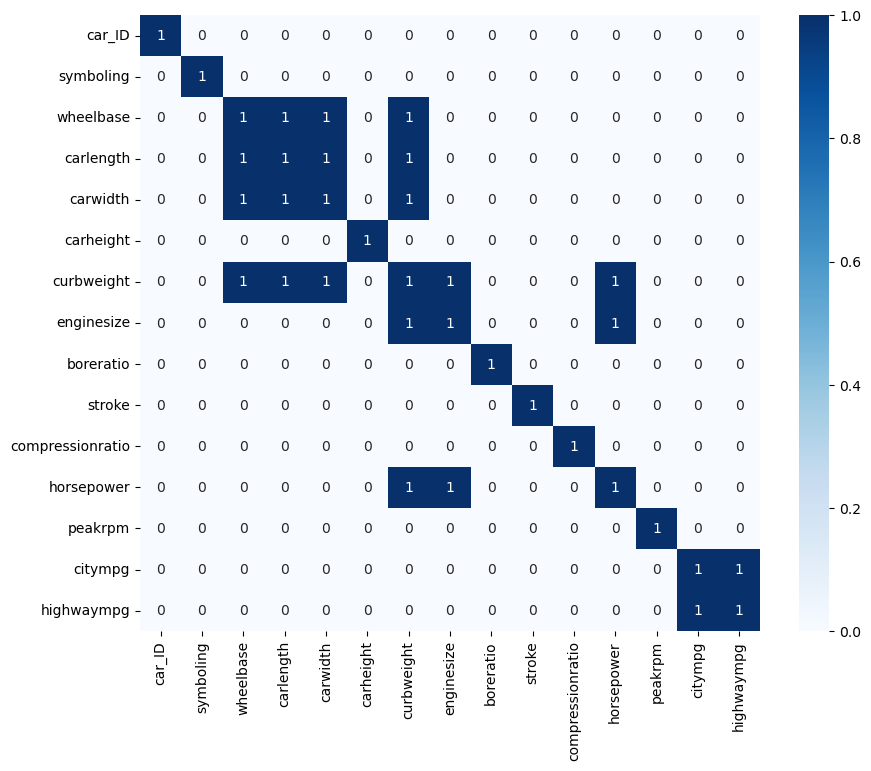

In [ ]:
##Feature-Feature correlation with >0.75
c=0
import matplotlib.pyplot as plt
x=data.drop('price',axis=1)
numeric_data=x.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr()>0.75,annot=True,cmap='Blues')

for i in range(len(numeric_data.columns)):
    for j in range(i+1,len(numeric_data.columns)):
        if numeric_data.corr().iloc[i,j]>0.75:
            
            print(f"{numeric_data.columns[i]} and {numeric_data.columns[j]} have correlation of {numeric_data.corr().iloc[i,j]:.2f}")
            c+=1
print(c)
#8 unique columns
#wheel-base--->carlength
#carlength---->carwidth
#curb-weight--->enginesize
#city-mpg---->highway-mpg

<Axes: >

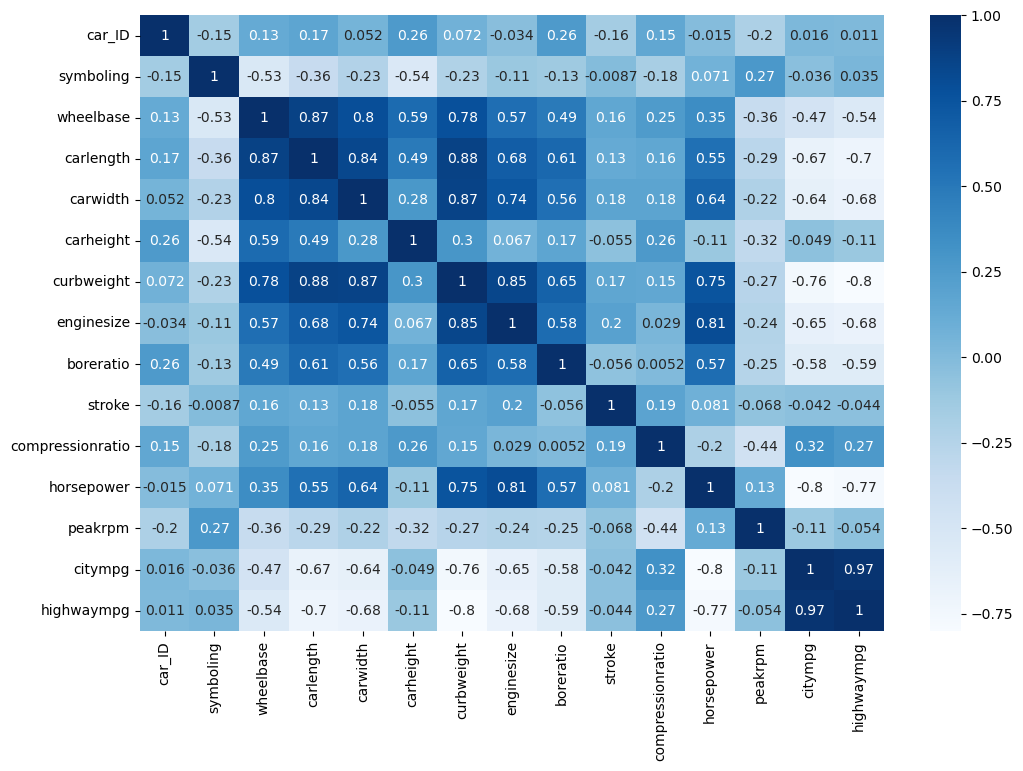

In [8]:
##Feature-Feature correlation
import matplotlib.pyplot as plt
x=data.drop('price',axis=1)
numeric_data=x.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='Blues')

In [46]:
c=0
import matplotlib.pyplot as plt
x=data.drop('price',axis=1)
numeric_data=x.select_dtypes(include='number')
# plt.figure(figsize=(10,8))
# sns.heatmap(numeric_data.corr()>0.75,annot=True,cmap='Blues')

for i in range(len(numeric_data.columns)):
    for j in range(i+1,len(numeric_data.columns)):
        if numeric_data.corr().iloc[i,j]>0.75:
            data.drop(numeric_data.columns[i],axis=1)
            data.drop(numeric_data.columns[j],axis=1)
            # print(f"{numeric_data.columns[i]} and {numeric_data.columns[j]} have correlation of {numeric_data.corr().iloc[i,j]:.2f}")
            c+=1
print(c)
numeric_data.columns


10


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [47]:


numeric_data = data.select_dtypes(include='number')

# Correlation with target
corr_with_price = numeric_data.corr()['price']

# Define threshold
threshold = 0.2

# Columns to DROP (weak correlation)
cols_to_drop = corr_with_price[abs(corr_with_price) < threshold].index

print("Columns to drop:")
print(cols_to_drop)
data.drop(columns=cols_to_drop, inplace=True)



Columns to drop:
Index(['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio',
       'peakrpm'],
      dtype='object')


In [40]:
data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


In [41]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('/Users/toshitha/Downloads/archive (3)/CarPrice_Assignment.csv')
data.head()
X1=data['enginesize']
y1=data['price']
X1,y1

(0      130
 1      130
 2      152
 3      109
 4      136
       ... 
 200    141
 201    141
 202    173
 203    145
 204    141
 Name: enginesize, Length: 205, dtype: int64,
 0      13495.0
 1      16500.0
 2      16500.0
 3      13950.0
 4      17450.0
         ...   
 200    16845.0
 201    19045.0
 202    21485.0
 203    22470.0
 204    22625.0
 Name: price, Length: 205, dtype: float64)

In [54]:
X1 = X1.reshape(-1, 1)
print(X1.shape) 


(205, 1)


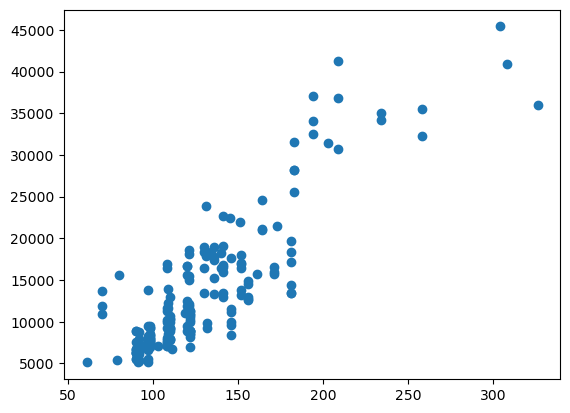

In [55]:
plt.scatter(X1,y1)

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X1,y1)
y1_pred=model.predict(X1)
y1_pred



array([13795.34859997, 13795.34859997, 17484.71376062, 10273.68185571,
       14801.53909833, 14801.53909833, 14801.53909833, 14801.53909833,
       13963.04701636, 13963.04701636, 10105.98343932, 10105.98343932,
       19497.09475734, 19497.09475734, 19497.09475734, 27043.52349503,
       27043.52349503, 27043.52349503,  2224.15786884,  7087.41194424,
        7087.41194424,  7087.41194424,  7087.41194424,  8428.99927539,
        7087.41194424,  7087.41194424,  7087.41194424,  8428.99927539,
       12453.76126882, 18155.50742619,  7422.80877703,  7422.80877703,
        5242.72936392,  7422.80877703,  7422.80877703,  7422.80877703,
        7422.80877703, 10441.3802721 , 10441.3802721 , 10441.3802721 ,
       10441.3802721 , 10441.3802721 , 10441.3802721 , 10609.0786885 ,
        7087.41194424,  7087.41194424, 11950.66601964, 35260.74589829,
       35260.74589829, 46664.23821303,  7255.11036063,  7255.11036063,
        7255.11036063,  7255.11036063,  7255.11036063,  3733.44361638,
      

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly

array([29668.82463263, 13243.14058734, 11400.49094241, 11558.07076978,
       24032.36184671,  8433.1451247 ,  9947.3365299 ,  8533.04659345,
        9685.27043922,  8433.1451247 , 14153.23216302,  8533.04659345,
       14909.77302839, 11717.74155238, 39926.71722089,  7978.2007602 ,
        7054.32304461, 18142.67080995, 11717.74155238,  9685.27043922,
       11717.74155238, 23589.25727992,  8433.1451247 ,  7978.2007602 ,
        7817.66742617, 29668.82463263, 16086.82034067, 15102.57263464,
        8433.1451247 , 15102.57263464, 24032.36184671,  7817.66742617,
        7978.2007602 , 21819.89598386,  8533.04659345, 24032.36184671,
        9685.27043922,  6955.07323127,  7817.66742617, 18142.67080995,
        9685.27043922])

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linear=mean_squared_error(y_test,y_pred)
r2_linear=r2_score(y_test,y_pred)
mse_poly=mean_squared_error(y_test,y_pred_poly)
r2_poly=r2_score(y_test,y_pred_poly)
# r2_score1=r2_score(y_train,Train_pred)
print(f"mse-linear:{mse_linear}\nr2-linear:{r2_linear}\nmse_poly:{mse_poly}\nr2_poly:{r2_poly*100}\n")

mse-linear:15465458.965908464
r2-linear:0.8040958796678976
mse_poly:11621389.455179848
r2_poly:85.27894915196237



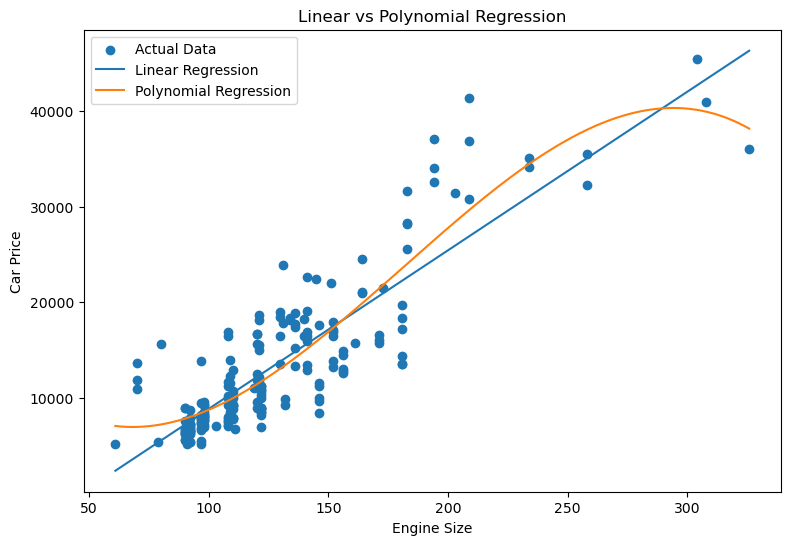

Linear Regression Prediction (200): [25427.14744504]
Polynomial Regression Prediction (200): [27760.60834541]


In [60]:
import numpy as np
X_grid = np.arange(X1.min(), X1.max(), 0.1).reshape(-1, 1)

# ----------------------------
# 6. Plot both models
# ----------------------------
plt.figure(figsize=(9, 6))

# Actual data
plt.scatter(X, y, label="Actual Data")

# Linear regression line
plt.plot(X_grid, model.predict(X_grid),
         label="Linear Regression")

# Polynomial regression curve
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)),
         label="Polynomial Regression")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# ----------------------------
# 7. Predict for engine size = 200
# ----------------------------
linear_price = model.predict([[200]])
poly_price = poly_reg.predict(poly.transform([[200]]))

print("Linear Regression Prediction (200):", linear_price)
print("Polynomial Regression Prediction (200):", poly_price)

<Axes: >

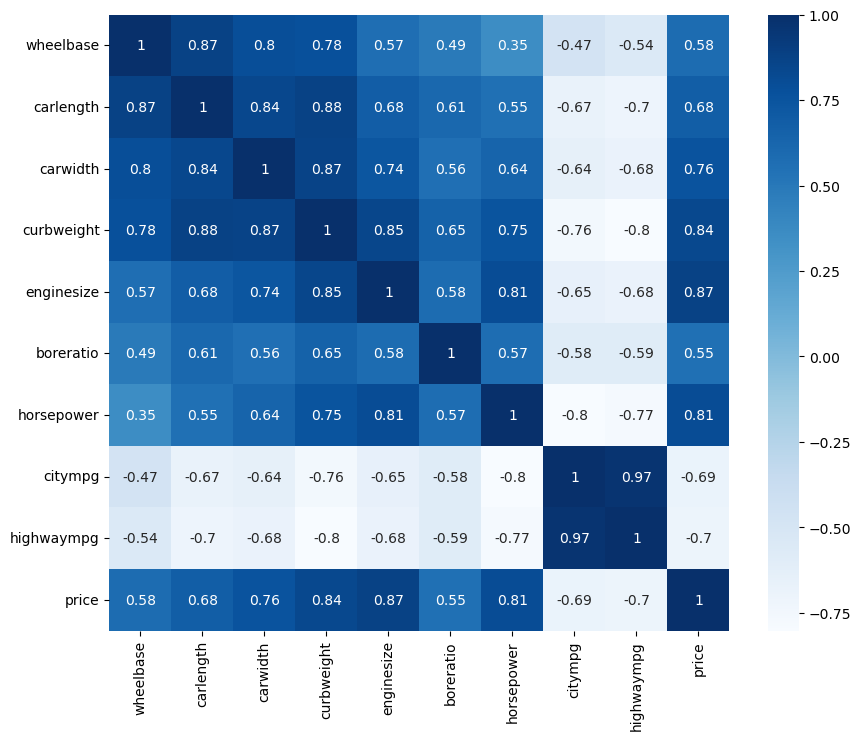

In [64]:
##Feature-Feature correlation with >0.75
# c=0
import matplotlib.pyplot as plt

numeric_data=data.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='Blues')

# for i in range(len(numeric_data.columns)):
#     for j in range(i+1,len(numeric_data.columns)):
#         if numeric_data.corr().iloc[i,j]>0.75:
            
#             print(f"{numeric_data.columns[i]} and {numeric_data.columns[j]} have correlation of {numeric_data.corr().iloc[i,j]:.2f}")
#             c+=1
# print(c)